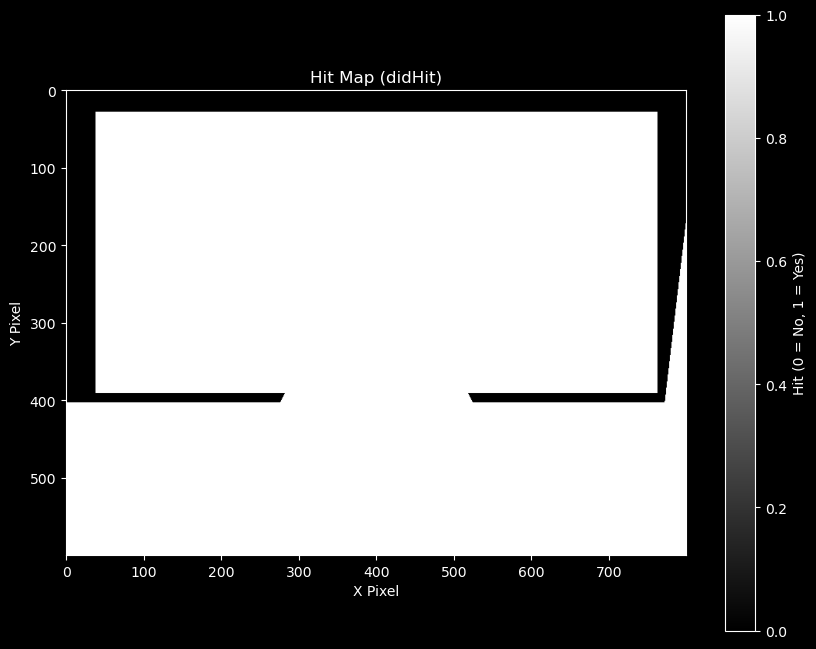

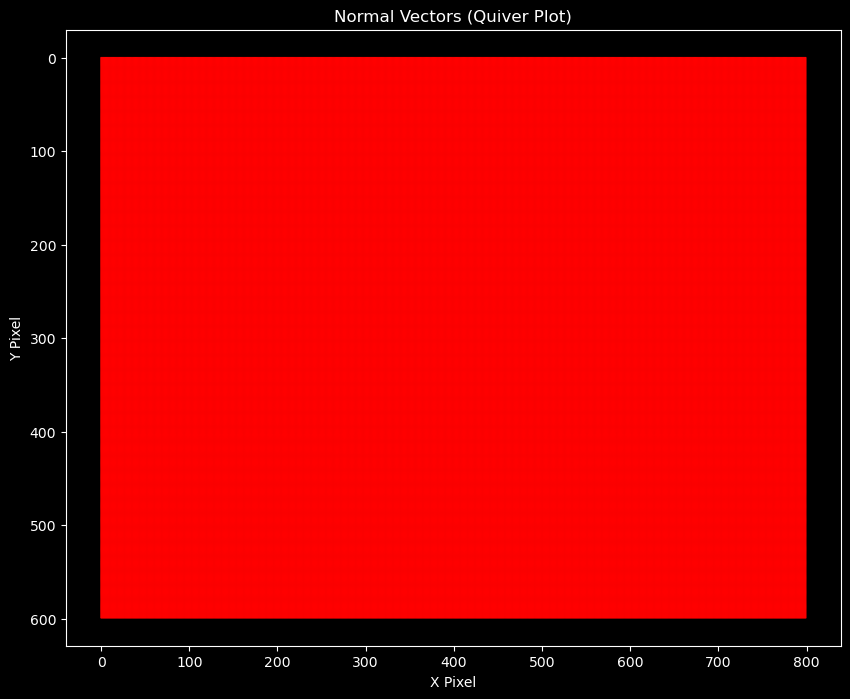

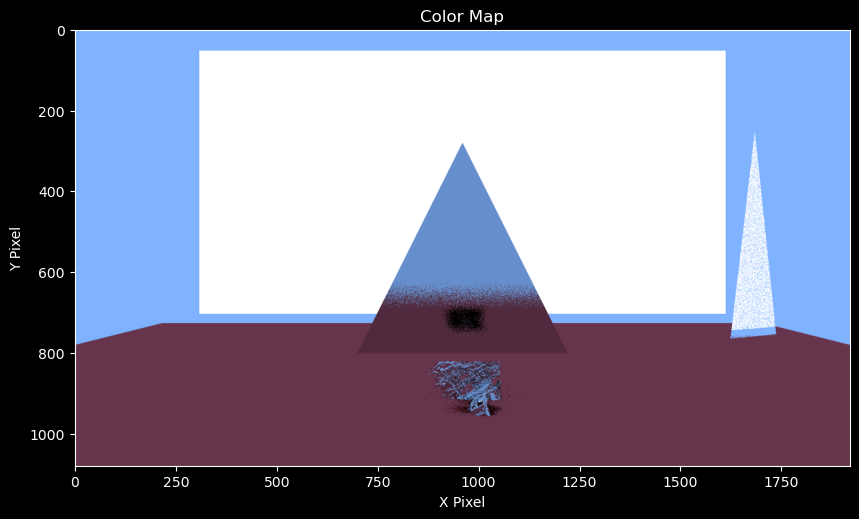

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
def load_csv(filename):
    try:
        data = pd.read_csv(filename)
        return data
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return None

# Visualize the hit map (didHit)
def visualize_hit_map(data, width, height):
    try:
        # Reshape didHit to image dimensions
        hit_map = data['didHit'].values.reshape((height, width))

        plt.figure(figsize=(10, 8))
        plt.title("Hit Map (didHit)")
        plt.imshow(hit_map, cmap="gray", origin="upper")
        plt.colorbar(label="Hit (0 = No, 1 = Yes)")
        plt.xlabel("X Pixel")
        plt.ylabel("Y Pixel")
        plt.show()
    except ValueError as e:
        print(f"Error visualizing hit map: {e}")

# Visualize normals as a quiver plot
def visualize_normals(data, width, height):
    try:
        # Reshape normal components
        normal_x = data['normalX'].values.reshape((height, width))
        normal_y = data['normalY'].values.reshape((height, width))

        # Create grid for quiver plot
        x = np.arange(width)
        y = np.arange(height)
        x, y = np.meshgrid(x, y)

        plt.figure(figsize=(10, 8))
        plt.title("Normal Vectors (Quiver Plot)")
        plt.quiver(x, y, normal_x, -normal_y, angles="xy", scale_units="xy", scale=1, color="red")
        plt.xlabel("X Pixel")
        plt.ylabel("Y Pixel")
        plt.gca().invert_yaxis()
        plt.show()
    except ValueError as e:
        print(f"Error visualizing normals: {e}")

# Visualize the color map from final_color.csv
def visualize_color_map(data, width, height):
    try:
        # Calculate the image dimensions based on the data size
        total_pixels = data.shape[0]
        calculated_height = total_pixels // width

        if total_pixels % width != 0:
            raise ValueError("Data size does not match the specified width and height.")

        # Rescale values to be in the range [0, 1] for RGB
        color_r = np.clip(data['colorR'].values.reshape((calculated_height, width)), 0, 1)
        color_g = np.clip(data['colorG'].values.reshape((calculated_height, width)), 0, 1)
        color_b = np.clip(data['colorB'].values.reshape((calculated_height, width)), 0, 1)

        # Stack the channels into an RGB image
        color_image = np.stack((color_r, color_g, color_b), axis=-1)

        plt.figure(figsize=(10, 8))
        plt.title("Color Map")
        plt.imshow(color_image, origin="upper")
        plt.xlabel("X Pixel")
        plt.ylabel("Y Pixel")
        plt.show()
    except ValueError as e:
        print(f"Error visualizing color map: {e}")

# Main function to load and visualize CSV data
def main():
    debug_filename = "debug_output.csv"
    color_filename = "final_color.csv"
    width_debug = 800  # Match with the CUDA program for debug_output.csv
    height_debug = 600

    width_color = 1920  # Example width for final_color.csv (1080p image)

    debug_data = load_csv(debug_filename)
    if debug_data is not None:
        visualize_hit_map(debug_data, width_debug, height_debug)
        visualize_normals(debug_data, width_debug, height_debug)

    color_data = load_csv(color_filename)
    if color_data is not None:
        total_pixels = color_data.shape[0]
        calculated_height = total_pixels // width_color
        visualize_color_map(color_data, width_color, calculated_height)  # Use dynamic height calculation

if __name__ == "__main__":
    main()
